# Assignment 3: Reinforcement Learning

**Goal**: Get familiar with a reinforcement learning approach to solve multi-armed bandit problem.

We will implement a value-based reinforcement learning approach with two
algorithm variations: epsilon-greedy (e-greedy) and upper confidence bound
(UCB) algorithms and perform an analysis on their behavior.

Please answer the `Questions` and implement coding `Tasks` by filling **PLEASE FILL IN** sections. *Documentation* of your code is also important. You can find the grading scheme in implementation cells.

* Plagiarism is automatically checked and set to **0 points**

* It is allowed to learn from external resources but copying is not allowed. If you use any external resource, please cite them in the comments (e.g. `# source: https://...../` (see `fitness_function`))

* Use of generative AI to answer **ANY** part of the assignment is
**strictly prohibited**, if any part of the assignment is found to be
answered using generative AI, the question will be awarded **0 points**.

## 1. Introduction: Multi-Armed Bandit Problem

Imagine you are in a casino facing a row of slot machines, say there are 20 of them. Each slot machine is providing reward based on a certain probability distribution that is unknown to you.

This is your first time in this casino, thus you have no idea what to do next. You have just enough money to play for 100 times and each of these times, you can pick any machine you want and after "pulling"

What would you do?

The overall goal would of course be to find out the one that is providing the most reward, right? What should your algorithm be to get the most reward at the end?

## 2. Implementation

In [4]:
%pip install "matplotlib>=3.7" "numpy>=1.25" "tqdm>=4.65" ipywidgets --user

Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install "matplotlib>=3.7" "numpy>=1.25" "tqdm>=4.65" --upgrade --user

Note: you may need to restart the kernel to use updated packages.


In [6]:
%matplotlib inline

In [7]:
# First import the dependencies
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import trange

**Question 1 (0-0.25-0.5pt):** Please write down mathematical expressions arm selection for the e-greedy and UCB algorithms and discuss their parameters.

**Answer:** 
The e-greedy algorithm usually selects the best arm with the probabily 1-x and a random arm with the probability of x. A higher x value means there is more random selection whereas a lower x value means there is more exploitation.

For e-greedy, here is the mathematical expression. A(t) = argmax_a Q(a) with probability 1-x, and A(t) = random arm with probability x

The UCB Algorithm selects whichever arm has the highest upper confidence bound. The upper condifence bound can be calculated as the sum of the appeoximate value of the arm and a confidence interval. This confidence interval is in proportion with the square root of the logarithm of the total number of arm selections divided by the no. of times the arm was selected. 

The mathematical expression for UCB is; A(t) = argmax_a [ Q(a) + c * sqrt( ln(t) / N(a) ) ]


**Task 1 (3 pt):** Please implement the e-greedy and UCB algorithms in the code given below.

In [8]:
#################################
# Grading
# 0 pts if the code does not work, code works but it is fundamentally incorrect
# 0.75 pts if the code works but some functions are incorrect and it is badly explained
# 1.5 pts if the code works but some functions are incorrect but it is explained well
# 2.25 pts if the code works very well aligned with the task without any mistakes, but it is badly explained
# 3 pts if the code works very well aligned with the task without any mistakes, and it is well explained
################################################################


# ============ PLEASE DO NOT CHANGE ============ #


def initialize(n_arms):
    rng = np.random.default_rng()
    R = rng.uniform(low=0.45, high=0.55, size=n_arms)
    R[rng.integers(n_arms)] = 0.9
    # return actual mean of the reward probabilities
    return R


# ================================================ #


# the epsilon-greedy algorithm (ignore kwargs)
def e_greedy(Q, epsilon, **kwargs):
    ########### PLEASE FILL IN ##############
    exp = np.random.random() < epsilon
    if exp:
        selection = np.random.randint(len(Q))   # randomly select an arm
    else:
        selection = np.argmax(Q)    # select the best arm
    #########################################
    return selection


# The upper confidence bound algorithm (ignore kwargs)
def UCB(Q, selection_counter, t, **kwargs):
    C = 0.5  # Parameter (keep it constant)
    UCB_val = Q + C * np.sqrt((2 * np.log(t + 1)) / (selection_counter + 0.00001))  # UCB value for each arm
    selection = np.argmax(UCB_val)  # select the arm with the highest UCB value
    return selection


def MAB(
    trials,  # total number of arm pulls
    n_arms,  # number of arms to pull
    epsilon,  # exploration parameter for the epsilon-greedy algorithm
    alpha,  # learning rate for updating Q-values
    init,  # initial starting value of the Q-values
    algorithm,  # the type of update: e_greedy or UCB
):
    # ============ PLEASE DO NOT CHANGE ============ #
    # initialization of the reward distributions unknown to the player
    R = initialize(n_arms)
    cumulative_reward_trend = np.zeros(trials)
    selection_trend = np.zeros(trials)
    reward_trend = np.zeros(trials)
    cumulative_reward = 0

    # initialize counter of selection for each arms
    selection_counter = np.zeros(n_arms)

    # initialize initial estimates of rewards
    Q = np.ones(n_arms) * init
    # ================================================ #

    for i in trange(trials):
        # ============ PLEASE DO NOT CHANGE ============ #
        # select an arm to pull based on reward estimates and other
        kwargs = {
            "Q": Q,
            "epsilon": epsilon,
            "selection_counter": selection_counter,
            "t": i,
        }
        selection = algorithm(**kwargs)
        reward = np.random.normal(R[selection], 0.01)
        # ================================================ #

        ########### PLEASE FILL IN ##############
        # Update Q values
        Q[selection] = Q[selection] + alpha * (reward - Q[selection])
        ########################################

        # ============ PLEASE DO NOT CHANGE ============ #
        reward_trend[i] = reward
        selection_trend[i] = selection
        selection_counter[selection] += 1
        cumulative_reward += reward
        cumulative_reward_trend[i] = cumulative_reward
        # ================================================ #

    return reward_trend

**Question 2 (0-0.25-0.5pt):** Please explain the concept of exploration and exploitation in the context epsilon-greedy and UCB algorithm contexts.
How does the epsilon-greedy algorithm balance exploration and exploitation?


**Answer:** Exploration and exploitation tend to represent the two opposite sides of objectives. Exploration is trying out different functions to gather information about the outcomes. Exploration takes risks and tries new things to see if they might lead to better results. Here, exploration is greatly achieved by randomly selecting a random arm (function).

Exploitation on the other hand is the act of choosing the best action based on the information gathered so far. Exploitation uses the knowledge we have to get the best outcome. Here, exploitation is achieved by selecting the arm that has the highest estimated reward.

The epsilon-greedy algorithm helps balancing exploration and explotation. Using a probabilty of epsilon (described as x in the first question), it explores by choosing a random arm and and with a probability of 1-x, it exploits by choosing the best arm.

---

## 3. Algorithm Analysis

In [9]:
# ============ PLEASE DO NOT REMOVE ============ #
def plot_experiments(experiment1, experiment2, labels):
    experiment1 = np.array(experiment1)
    experiment1_std = np.std(experiment1, axis=0)
    experiment1_mean = np.mean(experiment1, axis=0)

    experiment2 = np.array(experiment2)
    experiment2_std = np.std(experiment2, axis=0)
    experiment2_mean = np.mean(experiment2, axis=0)

    mean = [experiment1_mean, experiment2_mean]
    std = [experiment1_std, experiment2_std]

    plt.figure(figsize=(12, 6))
    y_values = np.arange(0, len(mean[0]))
    for i in range(len(mean)):
        plt.plot(y_values, mean[i], label=labels[i])
        plt.fill_between(y_values, mean[i] + std[i], mean[i] - std[i], alpha=0.2)

    plt.xlabel("Arm pulls (trials)")
    plt.ylabel("Average reward of 20 runs")

    plt.legend()


# ================================================ #

## 2. Comparison of e-greedy and UCB algorithms

Running the code below will launch all the experiments that we would like to plot and perform analysis on.

In [10]:
experiment1 = []  # epsilon greedy epsilon: 0.1 initial Q: 0
experiment2 = []  # epsilon greedy epsilon: 0.1 initial Q: 1
experiment3 = []  # epsilon greedy epsilon: 0.2 initial Q: 0

experiment4 = []  # UCB initial Q: 0
experiment5 = []  # UCB initial Q: 1

for _ in trange(20):
    # MAB(trials, n_arms, epsilon, alpha, init, algorithm)
    experiment1.append(MAB(5_000, 20, 0.1, 0.1, 0, e_greedy))
    experiment2.append(MAB(5_000, 20, 0.1, 0.1, 1, e_greedy))
    experiment3.append(MAB(5_000, 20, 0.2, 0.1, 0, e_greedy))

    experiment4.append(MAB(5_000, 20, 0.1, 0.1, 0, UCB))
    experiment5.append(MAB(5_000, 20, 0.1, 0.1, 1, UCB))

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

---
**Question 3 (0-0.5-1pt):** Plot and compare the average rewards for e-greedy and UCB algorithms for initial Q: 0 in different period of the process.

Please discuss in each phase of the process, which algorithm worked better and why?

**Answer:** In the first phase of the process, both algoirthms have performed very similarly. Thsi is because they both start with no knowledge about the environment and make decisions based on exploration. Further into the process, both algorithms start to gather information about the environment thus their performance starts to diverge. Through the epsilon-greedy algorithm, depending on the value of epsilon (x), might continue to make a random decision at any significant time, which could lead to non-optimal results if the best action is already known. The UCB algorithm instead increases exploitation over time. It uses a confidence interval that decreases as an action is chosen more often, which means it becomes increasingly likely to choose the action with the highest estimated reward. Due to this there could be higher average rewards in the later stages of the process. In the final phase, UCB outperforms the epsilon-greedy algorithm while the epsilon-greedy algoirthm continues to explore with a fixed proabibility of epsilon(x).

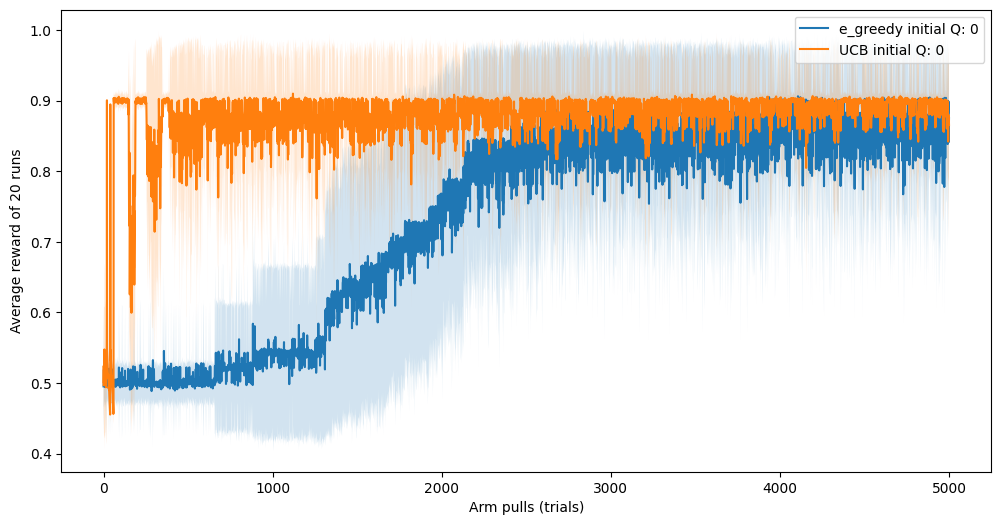

In [11]:
label = ["e_greedy initial Q: 0", "UCB initial Q: 0"]
plot_experiments(
    experiment1,
    experiment4,
    label,
)

---
**Question 4 (0-0.5-1pt):** Plot and compare the average rewards for e-greedy and UCB algorithms for initial Q: 1 in different period of the process.

Please discuss in each phase of the process, which algorithm worked better and why?

**Answer:** In the first phase of the process, both algoirthms have performed very diversely. Further into the process, both algorithms start to gather information about the environment thus their performance starts to in this case, converge. Through the epsilon-greedy algorithm, depending on the value of epsilon (x), might continue to make a random decision at any significant time, which could lead to non-optimal results if the best action is already known.

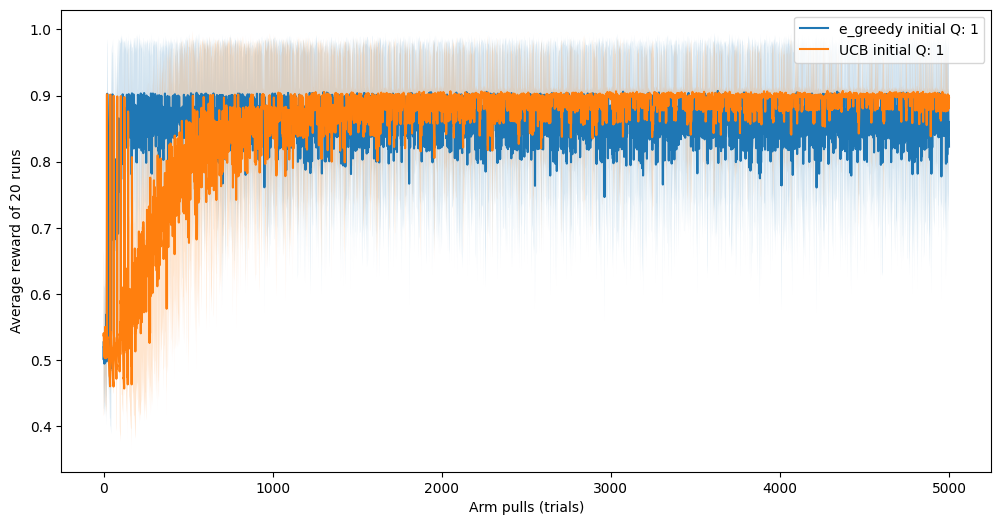

In [12]:
label = ["e_greedy initial Q: 1", "UCB initial Q: 1"]
plot_experiments(
    experiment2,
    experiment5,
    label,
)

---
**Question 5 (0-0.5-1pt):** Plot and compare the average rewards for e-greedy for initial Q: 0 for epsilon values 0.1 and 0.2 in different period of the process.

Please discuss in each phase of the process, which algorithm worked better and why?

**Answer:** In the initial phase of the process, the algorithm with epsilon 0.2 performs better, as it explores more and therefore has a higher chance of finding the best action. As the process continues and the algorithm starts to gather information about the environment, the performance starts to diverge. The algorithm with epsilon 0.1, by exploring less, starts to exploit the best action more often, leading to higher average results. In the final phase, the algorithm with epsilon 0.1 outperforms the algorithm with epsilon 0.2, as it fully exploits the best action, while the algorithm with epsilon 0.2 continues to explore with a higher probability, leading to suboptimal results.

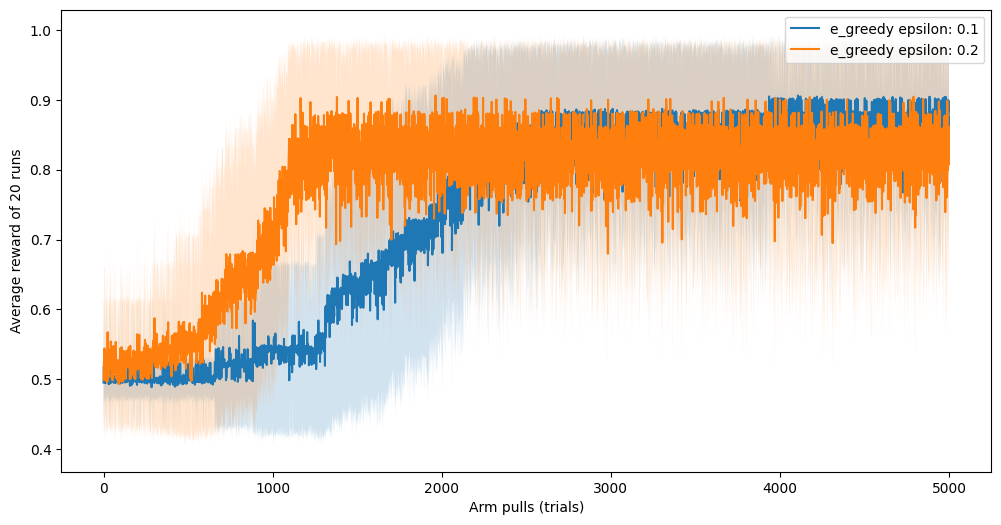

In [13]:
label = ["e_greedy epsilon: 0.1", "e_greedy epsilon: 0.2"]
plot_experiments(
    experiment1,
    experiment3,
    label,
)

---
**Question 6 (0-0.5-1pt):** Plot and compare the average rewards for e-greedy for epsilon = 0.1 initial Q: 0 and 1 in different period of the process.

Please discuss in each phase of the process, which algorithm worked better and why?

**Answer:** In the initial phase of the process, the algorithm with initial Q 1 performs better, as it starts with a higher estimation of the rewards, leading to more exploitation and potentially higher rewards if the initial estimation is close to the actual rewards. As the process continues and the algorithm starts to gather information about the environment, the performance starts to converge. Both algorithms adjust their Q values based on the received rewards, so the initial Q value becomes less important over time. In the final phase, the performance of the two algorithms are similar, as they both fully exploit the best action based on the learned Q values.

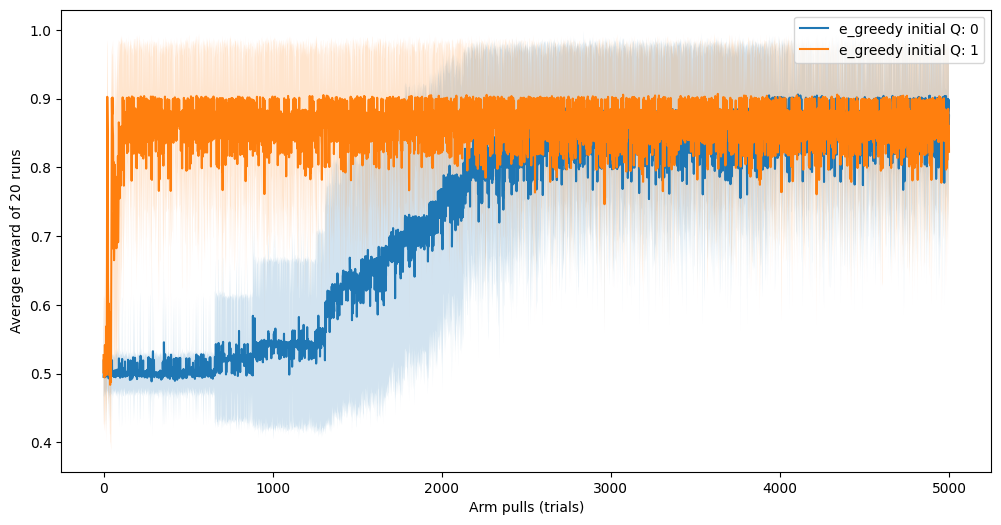

In [14]:
label = ["e_greedy initial Q: 0", "e_greedy initial Q: 1"]
plot_experiments(
    experiment1,
    experiment2,
    label,
)

---
**Question 7 (0-0.5-1pt):** Plot and compare the average rewards for UCB initial Q: 0 and 1 in different period of the process.

Please discuss in each phase of the process, which algorithm worked better and why?

**Answer:** In the initial phase of the process, the first algorithm performs better, as it starts with a higher estimation of the rewards, leading to more exploitation and potentially higher rewards if the initial estimation is close to the actual rewards. As the process continues and the algorithm starts to gather information about the environment, the performance starts to converge. Both algorithms adjust their Q values based on the received rewards, so the initial Q value becomes less important over time. In the final phase, the performance of the two algorithms are similar, as they both fully exploit the best action based on the learned Q values.

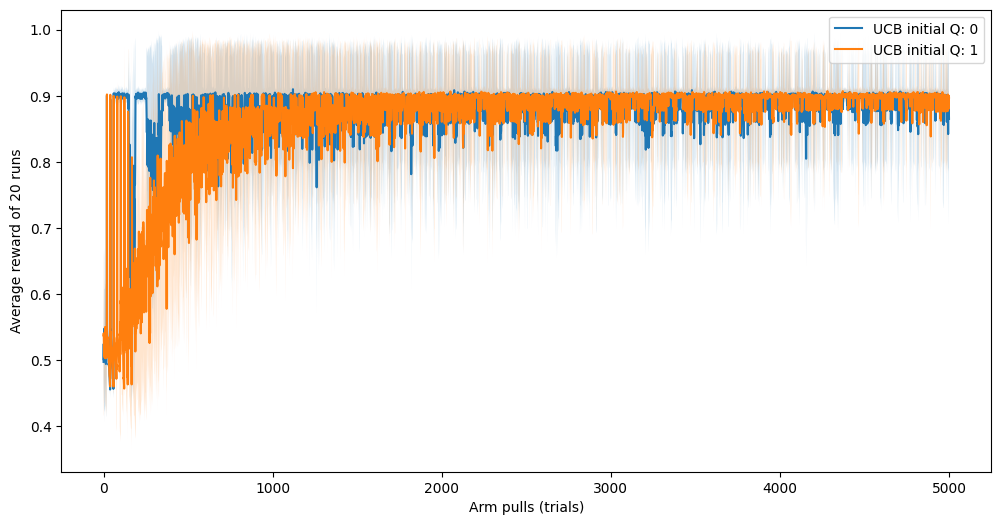

In [15]:
label = ["UCB initial Q: 0", "UCB initial Q: 1"]
plot_experiments(
    experiment4,
    experiment5,
    label,
)

---

## 3. Final remarks

**Question 8 (0-0.5-1pt):** Based on the all plots and analysis, please plot the best and worst performing algorithms and discuss the comparison? Discuss why that may be the case.

**Answer:** The UCB algorithm with initial Q1 performs the best because it starts with a higher estimation of the rewards, leading to more exploitation and potentially higher rewards if the initial estimation is close to the actual rewards. Furthermore, the UCB algorithm increases exploitation over time, which means it becomes increasingly likely to choose the action with the highest estimated result. On the other hand, the epsilon-greedy algorithm with epsilon 0.2 performs the worst because it continues to explore with a high probability (0.2), even after it has gathered sufficient information about the environment. This leads to suboptimal rewards as it often chooses non-optimal actions.

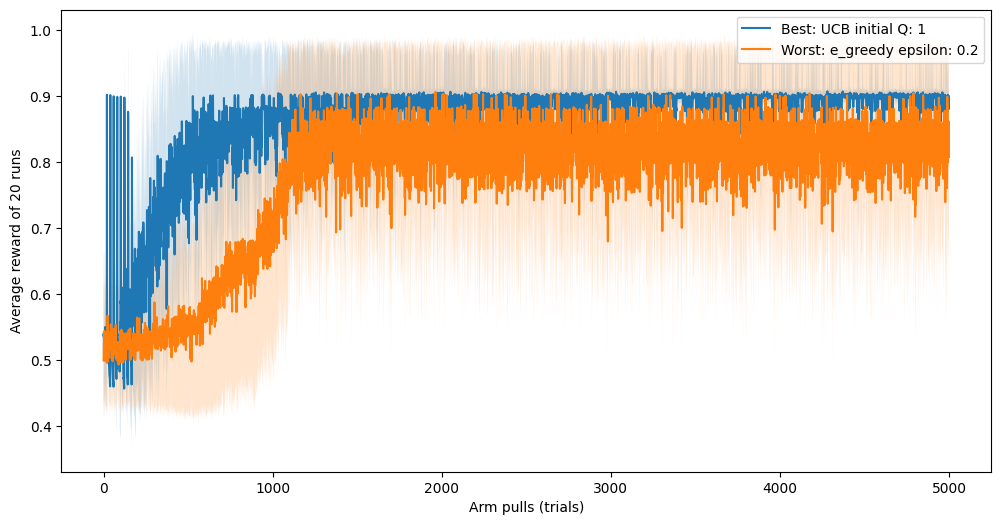

In [16]:
# PLOT THE BEST AND WORST PERFORMING ALGORITHMS AND COMPARE
label = ["Best: UCB initial Q: 1", "Worst: e_greedy epsilon: 0.2"]
plot_experiments(
    experiment5,
    experiment3,
    label,
)